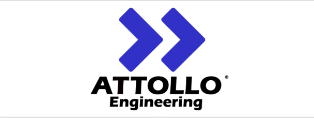

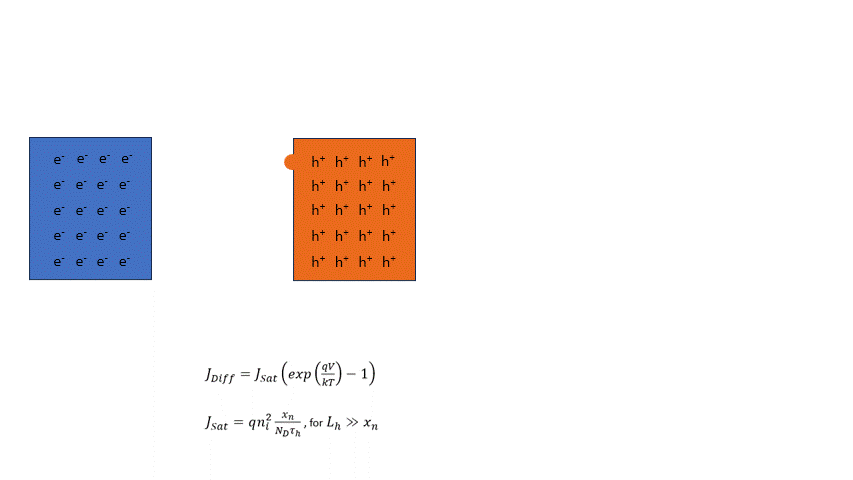

In [2]:
# -*- coding: utf-8 -*-
"""
Created for Photonics Project by Ed Huang
August 2023
V0 - formulas and graph without UI
V1 - with UI added

"""
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Layout, widgets, FloatLogSlider
from colorama import Fore, Back, Style, init


#Physical constants (DO NOT CHANGE)
q = 1.60217e-19; #C
h = 6.626e-34; #J.s
c = 2.998e8; #m/s
k = 1.38e-23; #J/K
epsilon_0 = 8.85e-14 #F/cm

######################################

#Photocurrent INPUTS
#P = 0.1; #W/cm^2, optical power density on detector
#QE = 0.7; #e/ph

#Lambda = 1650; #nm, cutoff wavlength
#T = 300; #K, operating temperature
#x = 10e-4; #cm, active region thickness
#Nd = 1e16; #1/cm^3, active region doping level
#tao = 1e-3; #s, minority carrier life time

MP = 2.0; #Max Power
Nc = 3e19; #1/cm^3, CB effective density of states @ temp
Nv = 1e19; #1/cm^3, VB effective density of states @ temp
Na = 1e19; #1/cm^3
epsilon_s = 14.9; #relative permittivity

print(Style.BRIGHT +"SET PARAMETERS:  \n")
######################################

def plot_pc(Lambda,T,x,QE,tao,Nd,P):

    #Photon and thermal energy (DO NOT CHANGE)
    Eg_J = h*c/(Lambda*1e-6); #J
    Eg_eV = 1.240/Lambda; #eV
    kT_J = k*T; #J
    kT_eV = k*T*6.242e18; #eV

    #Detector parameter OUTPUTS (DO NOT CHANGE)
    ni = np.sqrt(Nc*Nv*np.exp(-1*Eg_eV/kT_eV));
    Jdiff_sat = q*ni**2*x/(Nd*tao);
    

    #Photo current OUTPUTS (DO NOT CHANGE)
    Flux = P/Eg_J/100**2; #ph/s/cm^2, assumes photon energy @ Lambda only
    MaxFlux = MP/Eg_J/100**2; #ph/s/cm^2, assumes photon energy @ Lambda only
    Jphoto = q*Flux*QE; #A/cm^2
    MaxJP = q*MaxFlux*QE; #A/cm^2
    

    #Dark current and photo current OUTPUTS (DO NOT CHANGE)
    V = np.arange(-1, 1.1, 0.001);
    Jdiff = Jdiff_sat *(np.exp(q*V/(kT_J))-1);
    Jtot = Jdiff-Jphoto;
    MaxJtot = Jdiff-MaxJP
    Jdiff_abs = abs(Jdiff)
    Jtot_abs = abs(Jtot)
    MaxJtot_abs = abs(MaxJtot)

    #Depletion region OUTPUTS (DO NOT CHANGE)
#    V0 = kT_eV*np.log(Nd*Na/ni**2); #V, built in voltage
#    xn = np.sqrt(2*epsilon_s*epsilon_0*V0/(q*Nd*(1+(Nd/Na)))); #cm, n-side
#    xp = xn*Nd/Na; #cm, p-side
#    W = np.sqrt(2*(epsilon_s*epsilon_0/q)*((1/Nd)+(1/Na))*V0); #cm, depletion width
#    Emax = q*Nd*xn/(epsilon_s*epsilon_0); #V/cm, max E-field
    
    print(Style.BRIGHT +"\n")
    print(f"CALCULATED RESULTS: \n")
    print(f"Jdark, saturation = {Jdiff_sat:.2e} A/cm^2 \n")
    print(f"Jphoto = {Jphoto:.2e} A/cm^2 \n")

    #Plot dark and photo currents in graph
    #fig, ax = plt.subplots()
    plt.figure(figsize=(14,7))
    plt.plot(V, Jdiff_abs, label = 'Diffusion Dark Current', color='blue') #graph dark current
    plt.yscale('log')
    plt.plot(V, Jtot_abs, label = 'Dark + Photocurrent', color='red') #graph total current
    plt.yscale('log')
    plt.axis([-1,0.5,0.01*Jdiff_abs[0],25*MaxJtot_abs[0]])
    plt.grid()
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current Density (A/cm^2)')
    plt.title('1D P+ N One-sided Homojunction Diode Diffusion Current')
    plt.legend()
    #plt.show()
    
    


# Description width style
style1 = {'description_width': 'initial'} 
    
interact(plot_pc, 
           
            Lambda = widgets.FloatText(value=1.650, step=5, description="Wavelength (um):", style=style1),   
            T = widgets.FloatText(value=300.0, step=5, description="Temperature (K):", style=style1),
            x = widgets.FloatText(value=10e-4, step=0.5e-4, description="Active region thickness (cm):", style=style1),
            Nd = widgets.FloatText(value=1.0e16, step=1e13, description="Active region n-doping (cm^-3):", style=style1),
            QE = widgets.FloatText(value=0.70, step=0.05, description = 'Quantum Efficiency (e-/photon):', style=style1),
            tao = widgets.FloatText(value=1e-3, step=10e-9, description="Minority carrier lifetime (s):", style=style1),
            #tao = widgets.FloatSlider(value=1e-3, min=1e-9, max=10e-3, step=10e-9, description="Minority carrier lifetime (s):", layout=Layout(width='800px'), style=style1, readout_format = '.1e', continuous_update=False),
            #Nd = widgets.FloatSlider(value=1e16, min=1e13, max=5e17, step=1e13, description="Active region n-doping (cm^-3):", layout=Layout(width='800px'), style=style1, readout_format = '.1e', continuous_update=False),
            #P = widgets.FloatSlider(value=0.0001, min=0.00001, max=MP, step=0.01, description = 'Irrandiance (W/cm^2) @ wavelength:',layout=Layout(width='800px'), style=style1, readout_format = '.1e',continuous_update=False),
            P = FloatLogSlider(value=0.0001, min=-5, max=0, step=0.1, base=10, description="Irradiance (W/cm^2) @ wavelength:", layout=Layout(width='850px'), style=style1, readout_format = '.1e',continuous_update=False)
        )


SET PARAMETERS:  



interactive(children=(FloatText(value=1.65, description='Wavelength (um):', step=5.0, style=DescriptionStyle(d…

<function __main__.plot_pc(Lambda, T, x, QE, tao, Nd, P)>

Created for Photonics Project by Ed Huang - Attollo Engineering,  August 2023